<a href="https://colab.research.google.com/github/teeranutp/upload-1/blob/main/Python_Web_Scraping_11_July.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beautiful Soup

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [ ]:
!pip list | grep bs4

bs4                           0.0.1              


In [ ]:
# review basic python
list_a = ['toy', 'zue', 'aan']
tuple_a = ['banana', 'apple', 'grape']
dict_a = {'name': 'toy', 'age': 32}

In [ ]:
# https://www.worldometers.info/coronavirus/

In [ ]:
# get content from the url
my_url = "https://www.worldometers.info/coronavirus/"
page = requests.get(my_url)

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live Update: 187,269,771 Cases and 4,042,867 Deaths from the Coronavirus - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-tou
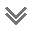

In [ ]:
page.text

In [ ]:
soup = BeautifulSoup(page.text, 'html5lib')

In [ ]:
# id=main_table_countries_today

In [ ]:
# get table header
table_header = soup.select('#main_table_countries_today thead tr')
table_header[0]('th')

[<th width="1%">#</th>,
 <th width="100">Country,<br/>Other</th>,
 <th width="20">Total<br/>Cases</th>,
 <th width="30">New<br/>Cases</th>,
 <th width="30">Total<br/>Deaths</th>,
 <th width="30">New<br/>Deaths</th>,
 <th width="30">Total<br/>Recovered</th>,
 <th width="30">New<br/>Recovered</th>,
 <th width="30">Active<br/>Cases</th>,
 <th width="30">Serious,<br/>Critical</th>,
 <th width="30">Tot Cases/<br/>1M pop</th>,
 <th width="30">Deaths/<br/>1M pop</th>,
 <th width="30">Total<br/>Tests</th>,
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>,
 <th width="30">Population</th>,
 <th style="display:none" width="30">Continent</th>,
 <th width="30">1 Case<br/>every X ppl</th>,
 <th width="30">1 Death<br/>every X ppl</th>,
 <th width="30">1 Test<br/>every X ppl</th>,
 <th width="30">New Cases/1M pop</th>,
 <th width="30">New Deaths/1M pop</th>,
 <th width="30">Active Cases/1M pop</th>]

In [ ]:
import re 

header = []

for i in table_header[0]('th'):
    header.append(re.sub(r'[\s,//]', '', i.text.strip()))

print(header)

['#', 'CountryOther', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical', 'TotCases1Mpop', 'Deaths1Mpop', 'TotalTests', 'Tests1Mpop', 'Population', 'Continent', '1CaseeveryXppl', '1DeatheveryXppl', '1TesteveryXppl', 'NewCases1Mpop', 'NewDeaths1Mpop', 'ActiveCases1Mpop']


In [ ]:
# list comprehension
header = [re.sub(r'[\s,//]', '', i.text.strip()) for i in table_header[0]('th')]
print(header)

['#', 'CountryOther', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical', 'TotCases1Mpop', 'Deaths1Mpop', 'TotalTests', 'Tests1Mpop', 'Population', 'Continent', '1CaseeveryXppl', '1DeatheveryXppl', '1TesteveryXppl', 'NewCases1Mpop', 'NewDeaths1Mpop', 'ActiveCases1Mpop']


In [ ]:
# get table row
table_rows = soup.select("#main_table_countries_today tbody tr")

row_list = []
for tr in table_rows:
    row = []
    for td in tr('td'):
        row.append(td.text.strip())
    row_list.append(row)

print(row_list)

[['', 'North America', '40,985,570', '+10,553', '924,509', '+261', '34,444,419', '+4,831', '5,616,642', '11,287', '', '', '', '', '', 'North America', '', '', '', '', '', ''], ['', 'Asia', '57,458,775', '+13,474', '818,211', '+118', '54,549,781', '+5,587', '2,090,783', '28,053', '', '', '', '', '', 'Asia', '', '', '', '', '', ''], ['', 'South America', '33,955,392', '+919', '1,034,954', '+27', '31,155,314', '+1,420', '1,765,124', '28,423', '', '', '', '', '', 'South America', '', '', '', '', '', ''], ['', 'Europe', '48,822,712', '', '1,112,266', '', '45,837,648', '+707', '1,872,798', '6,090', '', '', '', '', '', 'Europe', '', '', '', '', '', ''], ['', 'Africa', '5,965,783', '', '151,594', '', '5,180,735', '', '633,454', '4,482', '', '', '', '', '', 'Africa', '', '', '', '', '', ''], ['', 'Oceania', '80,818', '+87', '1,318', '+1', '69,782', '', '9,718', '47', '', '', '', '', '', 'Australia/Oceania', '', '', '', '', '', ''], ['', '', '721', '', '15', '', '706', '', '0', '0', '', '', '', 

In [ ]:
# create dataframe
df = pd.DataFrame(
    row_list, 
    columns = header
)

df.head()

,#,CountryOther,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population,Continent,1CaseeveryXppl,1DeatheveryXppl,1TesteveryXppl,NewCases1Mpop,NewDeaths1Mpop,ActiveCases1Mpop
0,,North America,"40,985,570","+10,553","924,509",+261,"34,444,419","+4,831","5,616,642","11,287",,,,,,North America,,,,,,
1,,Asia,"57,458,775","+13,474","818,211",+118,"54,549,781","+5,587","2,090,783","28,053",,,,,,Asia,,,,,,
2,,South America,"33,955,392",+919,"1,034,954",+27,"31,155,314","+1,420","1,765,124","28,423",,,,,,South America,,,,,,
3,,Europe,"48,822,712",,"1,112,266",,"45,837,648",+707,"1,872,798","6,090",,,,,,Europe,,,,,,
4,,Africa,"5,965,783",,"151,594",,"5,180,735",,"633,454","4,482",,,,,,Africa,,,,,,


In [ ]:
# filter Thailand
df.query("CountryOther == 'Thailand'")

,#,CountryOther,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population,Continent,1CaseeveryXppl,1DeatheveryXppl,1TesteveryXppl,NewCases1Mpop,NewDeaths1Mpop,ActiveCases1Mpop
68,61,Thailand,"336,371","+9,539","2,711",+86,"247,971","+4,053","85,689","2,738","4,807",39,"8,129,670","116,173","69,979,188",Asia,208,"25,813",9,136,1,"1,224"


In [ ]:
df.loc[df["CountryOther"] == 'Thailand']

,#,CountryOther,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,TotCases1Mpop,Deaths1Mpop,TotalTests,Tests1Mpop,Population,Continent,1CaseeveryXppl,1DeatheveryXppl,1TesteveryXppl,NewCases1Mpop,NewDeaths1Mpop,ActiveCases1Mpop
68,61,Thailand,"336,371","+9,539","2,711",+86,"247,971","+4,053","85,689","2,738","4,807",39,"8,129,670","116,173","69,979,188",Asia,208,"25,813",9,136,1,"1,224"


In [ ]:
country = df.query("CountryOther == 'Thailand'").CountryOther.values[0]
newcases = df.query("CountryOther == 'Thailand'").NewCases.values[0]

print(country, newcases)

Thailand +9,539


# Line Notification

In [ ]:
line_token = "2VyuNbpMV0aS6UDFtIr4mbgLCSZofYrevrgSVQ3gW5V"

def line_notify(message, token):
    url = "https://notify-api.line.me/api/notify"
    data = ({'message': message})
    LINE_HEADERS = {'Authorization': 'Bearer ' + token}
    session = requests.Session()
    response = session.post(url, headers = LINE_HEADERS, data = data)
    return response 

In [ ]:
msg = f'{country}: {newcases}'
line_notify(msg, line_token) 

<Response [200]>

In [ ]:
!pip install schedule

In [ ]:
import schedule
import time

schedule.every(10).seconds.do(line_notify, msg, line_token)
# schedule.every().hour.do(line_notify, msg, line_token)
# schedule.every().day.do(line_notify, msg, line_token)
# schedule.every().monday.do(line_notify, msg, line_token)
# schedule.every().wednesday.at('12:00').do(line_notify, msg, line_token)

while True:
    try:
        schedule.run_pending()
        time.sleep(1)
    except:
        schedule.clear()
        break

# Selenium

In [ ]:
!pip install selenium

     |████████████████████████████████| 911kB 24.7MB/s 


In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin/
import sys
sys.path.insert(0, '/usr/lib/chromium-browser/chromedriver')

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-driver

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd 
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
driver = webdriver.Chrome('chromedriver', chrome_options = options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


In [ ]:
# https://shopee.co.th/

In [ ]:
url = "https://shopee.co.th/"
driver.get(url)

In [ ]:
driver.page_source

'<html lang="th"><head>\n<meta charset="utf-8">\n<meta name="viewport" content="width=1240,shrink-to-fit=no">\n<meta name="shopee:git-sha" content="af06b561d123c5ba8e1e6d98093b5d3af0997ec9">\n<meta name="shopee:version" content="pc-v4.84.0">\n<script async="true" type="text/javascript" src="https://sslwidget.criteo.com/event?a=34654&amp;v=5.7.1&amp;p0=e%3Dce%26m%3D%255B%255D&amp;p1=e%3Dexd%26site_type%3Dt&amp;p2=e%3Dvh&amp;p3=e%3Ddis&amp;adce=1&amp;tld=shopee.co.th&amp;dtycbr=67573" data-owner="criteo-tag"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/plugins/ua/linkid.js"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script type="text/javascript" async="" src="https://static.criteo.net/js/ld/ld.js"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-L4QXS6R7YG&amp;l=dataLayer&amp;cx=c"></script><script src="https://connect.facebook.n

In [ ]:
# search watch and enter (keyboard)
driver.find_element_by_class_name('shopee-searchbar-input__input').send_keys('watch' + Keys.ENTER)

In [ ]:
# get product names
list_products = driver.find_elements_by_class_name('PFM7lj')
print(list_products[3].text)

🌹🌹V4 Q12🌹🌹Smart Watch นาฬิกาสมาทร์วอทร์ ไอโม่ กันเด็กหายที่กำลังฮิตที่สุด โทเขาโทออกได้ มีระบบ gps อัฟเดทภาษาไทย


In [ ]:
list_products_text = []

for item in list_products:
    list_products_text.append(item.text)

list_products_text

['HUAWEI Band 6 อุปกรณ์สวมใส่ | สามารถใช้งานได้ 14 วัน และรองรับระบบชาร์จไว หน้าจอขนาดใว สายรัดข้อมืออัจฉริยะ',
 '[เหลือ 1028 บ. โค้ด BBDOZL5G] Xiaomi Mi Watch Lite สมาร์ทวอทช์ GPS + Heart Rate กันน้ำ -1Y',
 'พร้อมส่งจากไทย!สายสำหรับ Apple watch ทุกSeries SE 6/5/4/3/2/1 สายหนัง Leather Band',
 '🌹🌹V4 Q12🌹🌹Smart Watch นาฬิกาสมาทร์วอทร์ ไอโม่ กันเด็กหายที่กำลังฮิตที่สุด โทเขาโทออกได้ มีระบบ gps อัฟเดทภาษาไทย',
 'dpos นาฬิกาควอทซ์ สไตล์วินเทจ สวยเท่ห์ ดุดัน กันน้ำ ไม่ได้รับสินค้ายินดีคืนเงิน มีบริการเก็บเงินปลายทาง ส่งด่วนทุกวัน',
 '[โค้ด 77DDAYFASH ลด120] DANIEL WELLINGTON รุ่น DW00100161 DW00100163 ของแท้100% นาฬิกาแบรนด์เนม สายสแตนเลส OWD228',
 '[โค้ด FASHSUR15ลด150] MICHAEL KORS รุ่น MK6110 MK5799 MK5943 ของแท้100% นาฬิกาผู้หญิง พร้อมส่ง OWM154',
 '[โค้ด FASHSUR15ลด150] GUESS รุ่น W1053L1 W1049G2 W1094L2 ของแท้100% OWG111 (ฟรีคละกระเป๋าหรือกำไล)',
 'นาฬิกา Aosun ของแท้ 💯% ใส่ได้ทั้งผู้หญิงและผู้ชาย',
 'Casio G-Shock นาฬิกาข้อมือผู้ชาย สายเรซิ่น รุ่น DW-5600BB-1 - สีดำ（ของแท้100% ประกัน

In [ ]:
# get price
list_prices = list_products = driver.find_elements_by_class_name('_29R_un')


In [ ]:
list_prices_text = []

for item in list_prices:
    list_prices_text.append(item.text)

list_prices_text

['1,699',
 '1,390',
 '159',
 '199',
 '269',
 '219',
 '639',
 '799',
 '1,670',
 '2,290',
 '1,849',
 '2,290',
 '99',
 '299',
 '1,099',
 '299',
 '929',
 '39',
 '139',
 '1,799',
 '2,190']

In [ ]:
# combine a dataframe
shopee_df = pd.DataFrame(
    zip(list_products_text, list_prices_text), columns = ['products', 'prices']
)

shopee_df

,products,prices
0,HUAWEI Band 6 อุปกรณ์สวมใส่ | สามารถใช้งานได้ ...,"1,699"
1,[เหลือ 1028 บ. โค้ด BBDOZL5G] Xiaomi Mi Watch ...,"1,390"
2,พร้อมส่งจากไทย!สายสำหรับ Apple watch ทุกSeries...,159
3,🌹🌹V4 Q12🌹🌹Smart Watch นาฬิกาสมาทร์วอทร์ ไอโม่ ...,199
4,dpos นาฬิกาควอทซ์ สไตล์วินเทจ สวยเท่ห์ ดุดัน ก...,269
5,[โค้ด 77DDAYFASH ลด120] DANIEL WELLINGTON รุ่น...,219
6,[โค้ด FASHSUR15ลด150] MICHAEL KORS รุ่น MK6110...,639
7,[โค้ด FASHSUR15ลด150] GUESS รุ่น W1053L1 W1049...,799
8,นาฬิกา Aosun ของแท้ 💯% ใส่ได้ทั้งผู้หญิงและผู้ชาย,"1,670"
9,Casio G-Shock นาฬิกาข้อมือผู้ชาย สายเรซิ่น รุ่...,"2,290"


In [ ]:
# write csv file
df.to_csv('shopee_watch.csv')